# 1. Implementation a Unet structue for semantic segmentation

In [1]:
import numpy as np
import pandas as pd
from utils import load_data, train_val_split, plot_sample, plot_prediection_sample
from model import UnetBrain

# import crash_on_ipy
import sys

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

import tensorflow as tf


from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


Using TensorFlow backend.


In [2]:
# load data
train_data = load_data('./machine_learning_challenge/train_data.csv')
train_label = load_data('./machine_learning_challenge/train_label.csv')
test_data = load_data('./machine_learning_challenge/test_data.csv')
test_label = load_data('./machine_learning_challenge/test_label.csv')

X_train, y_train, X_val, y_val = train_val_split(train_data, train_label, val_size=0.20)

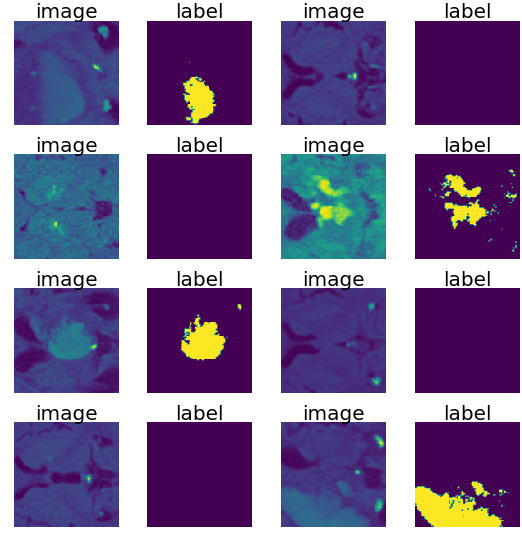

In [3]:
# sample plot
plot_sample(X_train, y_train)

In [4]:
# input parameters for unet model
params = {}
params['learning_rate'] = 0.000001
params['learning_decay'] = 0.95
params['num_filters'] = 16
params['kernel_size'] = 3
params['pooling_size'] = 2
params['dropout'] = 0.1
params['batch_norm']= True
params['image_size'] = 128

In [5]:
# unet model and some parameters
unet_model = UnetBrain(**params).model
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.0000001, verbose=1),
    ModelCheckpoint('model-UnetBrain.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
# # train the model 
# results = unet_model.fit(X_train, y_train, batch_size=32, epochs=150, callbacks=callbacks,\
#                     validation_data=(X_val, y_val))


plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

NameError: name 'results' is not defined

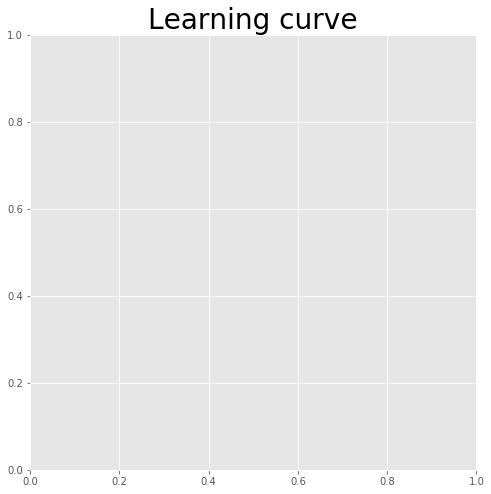

In [7]:
# # plot history of loss and metrics
# plt.figure(figsize=(8, 8))
# plt.title("Learning curve", fontsize=28)
# plt.plot(results.history["loss"], label="loss")
# plt.plot(results.history["val_loss"], label="validation loss")
# plt.plot(results.history["val_jaccard_discance"], label="jaccard_discance")
# plt.plot( np.argmin(results.history["val_jaccard_discance"]), np.min(results.history["val_jaccard_discance"]), marker="x", color="r", label="best model")
# plt.xlabel("Epochs", fontsize=28)
# plt.ylabel("loss and metrics", fontsize=28)

# plt.legend(fontsize=14)
# plt.show()


In [8]:
# use trained model on test data
# load the model parameters
unet_model.load_weights('model-UnetBrain.h5')
pred_test = unet_model.predict(test_data)

In [ ]:
# example plot of prediction result
plot_prediection_sample(test_data, test_label, pred_test)

# 1.2
## 1.2.1

### This supervised learning task need to do pixel level classification. Canonical frameworks like Segnet and Unet would be working. They share similar encoding and decoding structure.

### Segnet is more efficient for computation. Here I implemented the Unet.


## 1.2.2

### From the training histroy plot we can see that after 12 Epochs the validation loss and training loss are stable and similar. The training procedure stopped a moment after.

### Some possible improvement maybe include: 1. image preprocessing like augmentation, normailization scaling. 2. Fine tune the parameters. 3. Iterate with some CRF layers might improve the results.




# 2. 3D CNN

## 2.1 

### The implemented 2D Unet can be extended to 3D version.

## 2.2  
### A difficulty may be the number of parameters, which may lead to memory overflow.

### I would expect the 3D Unet version perform better than the 2D version. However, the training and running time will be much higher. Segnet might be faster in both training and running time but the perfomance might not be better than Unet. 